<a href="https://www.inove.com.ar"><img src="https://github.com/hernancontigiani/ceia_memorias_especializacion/raw/master/Figures/logoFIUBA.jpg" width="500" align="center"></a>


# Análisis de series temporales
## Clase 1
#### Hernán Contigiani


In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [92]:
!wget https://raw.githubusercontent.com/hernancontigiani/ceia_series_temporales/main/Datasets/S1MME_week45.csv --quiet
!wget https://github.com/hernancontigiani/ceia_series_temporales/raw/main/Datasets/registro_temperatura365d_smn.txt --quiet
!wget https://raw.githubusercontent.com/hernancontigiani/ceia_series_temporales/main/Datasets/YPFD.2000.2021.csv --quiet

In [65]:
# Graficar la serie temporal
def graficos_metrics(df, colname):
    df.plot.line(x="fecha", y=colname)
    plt.show()

    # Obtener valores estadísticos
    mu = df[colname].mean()
    median = df[colname].median()
    std = df[colname].std()
    asimetria = df[colname].skew()

    print("Media:", mu)
    print("Mediana:", median)
    print("Desvio:", std)
    print("Asimetria:", asimetria)

    # Graficar el histograma
    bins = 25
    count, bins, ignored = plt.hist(df[colname], bins, density=True)

    plt.plot(bins, 1/(std*np.sqrt(2*np.pi))*np.exp(-(bins-mu)**2/(2*std**2)), linewidth=2, color='r')
    plt.show()

    # Graficar el gráfico de cajas
    df[colname].plot.box()
    plt.show()

## Dataset - registro_temperatura

In [66]:
# Leer el dataset y extraer los datos a un formato que permita armar un dataframe
f1 = open("registro_temperatura365d_smn.txt")

# descartar las dos primeras filas
f1.readline()
f1.readline()
f1.readline()

datos = []

for row in f1.readlines():
    try:
        campos = row.split(" ")
        fecha = campos[0]
        day = fecha[:2]
        month = fecha[2:4]
        year = fecha[4:]
        tmax = float(campos[2])
        tmin = float(campos[4])

        ubicacion = campos[5]
        for campo in campos[6:]:
            if campo == "":
                break
            ubicacion += f" {campo}"

        datos.append([f"{year}-{month}-{day}", tmax, tmin, ubicacion])
        

    except Exception as e:
        pass
        #print("error..", e)

df1 = pd.DataFrame(datos, columns =['fecha', 'tmax', 'tmin', 'ubicacion'])
df1['fecha'] = pd.to_datetime(df1['fecha'], format="%Y-%m-%d")
df1 = df1.sort_values(by='fecha')

In [67]:
df1.head()

,fecha,tmax,tmin,ubicacion
24634,2020-10-09,29.6,12.5,VILLA DOLORES AERO
24606,2020-10-09,32.7,24.0,LAS LOMITAS
24605,2020-10-09,33.5,16.1,LA RIOJA AERO
24604,2020-10-09,21.6,10.2,LA PLATA AERO
24603,2020-10-09,26.2,14.5,JUJUY U N


In [68]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24635 entries, 24634 to 0
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   fecha      24635 non-null  datetime64[ns]
 1   tmax       24635 non-null  float64       
 2   tmin       24635 non-null  float64       
 3   ubicacion  24635 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 962.3+ KB


In [69]:
# Tomaremos la temperatura maxima capturada en una ubicacon
y_col = "tmax"
df1_aeroparque = df1[df1["ubicacion"] == "AEROPARQUE AERO"]
df1_aeroparque.head()

,fecha,tmax,tmin,ubicacion
24585,2020-10-09,24.5,13.3,AEROPARQUE AERO
24544,2020-10-10,19.6,12.2,AEROPARQUE AERO
24481,2020-10-11,19.0,13.3,AEROPARQUE AERO
24437,2020-10-12,22.5,11.2,AEROPARQUE AERO
24382,2020-10-13,21.1,14.6,AEROPARQUE AERO


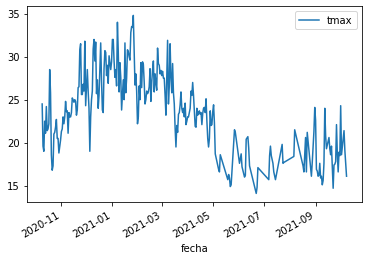

Media: 23.542807017543886
Mediana: 23.7
Desvio: 4.612306621919064
Asimetria: 0.03300770083077089


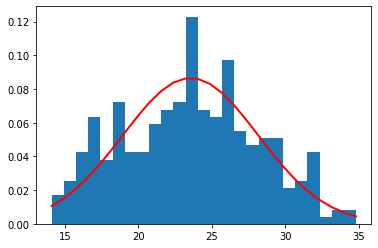

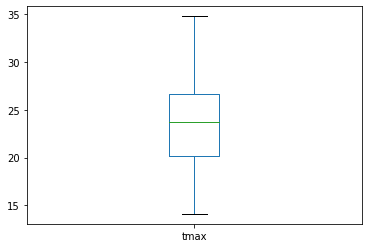

In [70]:
# Graficar la serie temporal para tmax
graficos_metrics(df1_aeroparque, "tmax")

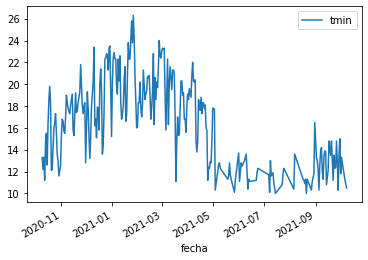

Media: 16.615789473684234
Mediana: 17.0
Desvio: 3.886831753791661
Asimetria: 0.10415345141232427


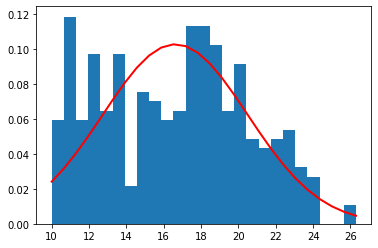

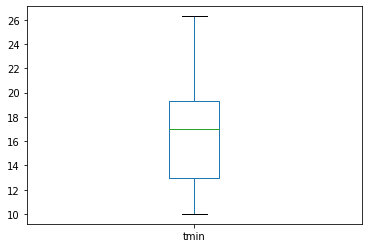

In [71]:
# Graficar la serie temporal para tmin
graficos_metrics(df1_aeroparque, "tmin")

__Conclusiones__:
- Se podría decir que las dos series de tiempo son no estacionarias, porque tienen un comportamiento distinto en diferentes épocas del año (creciente y decreciente). Pero considerando el ciclo del clima a nivel años se puede decir se podrían decir que son estacionarias (habría que tener datos de muchos años para evaluar si es cíclico realmente).
- Son discretas, ya que se toman una vez por día la temperatura.
- En el caso de tmax, es la distribución es bastante simétrica y gaussiana. Es prácticamente simétrica y el promedio coincide bastante con le media. Esto es llamativo, es como si las temperatuas máximas del principio de año se compenzaran con las temperaturas máximas de fin de año.
- En el caso de tmin, es la distribución no es simétrica. Las mediana está desplazada a la derecha ya que predominan las temperaturas mínimas altas a lo largo del año. Capaz con más datos este comportamiento sea simétrico como en la tmax.

## 2 - Dataset S1MME week45

In [72]:
df2 = pd.read_csv("S1MME_week45.csv")
df2.head()

,MyDay,NENAME,S1_mode_combined_attach_request_times_SEQ,S1_mode_combined_attach_success_times_SEQ
0,2020/11/02 0:00,MME1BEL,367245,225822
1,2020/11/02 1:00,MME1BEL,295774,176136
2,2020/11/02 2:00,MME1BEL,305409,195410
3,2020/11/02 3:00,MME1BEL,277590,146942
4,2020/11/02 4:00,MME1BEL,303168,176509


In [73]:
df2['fecha'] = pd.to_datetime(df2['MyDay'], format="%Y/%m/%d %H:%M")
df2 = df2.sort_values(by='fecha')
df2.head()

,MyDay,NENAME,S1_mode_combined_attach_request_times_SEQ,S1_mode_combined_attach_success_times_SEQ,fecha
0,2020/11/02 0:00,MME1BEL,367245,225822,2020-11-02
336,2020/11/02 0:00,MME1MUN,335722,205667,2020-11-02
168,2020/11/02 0:00,MME1CLI,457976,313875,2020-11-02
840,2020/11/02 0:00,MME2MUN,351902,210885,2020-11-02
672,2020/11/02 0:00,MME2CLI,355812,223078,2020-11-02


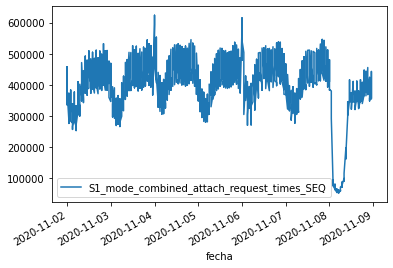

Media: 382133.5525793651
Mediana: 397835.0
Desvio: 90652.9548489912
Asimetria: -1.4401528830881754


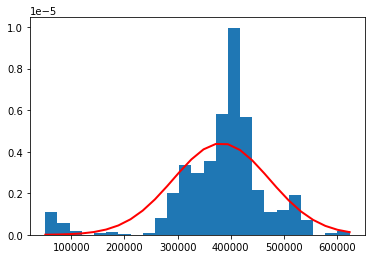

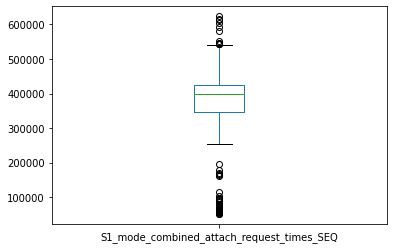

In [74]:
graficos_metrics(df2, "S1_mode_combined_attach_request_times_SEQ")

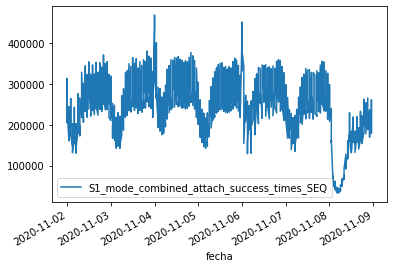

Media: 231401.26785714287
Mediana: 238415.0
Desvio: 67367.18912691588
Asimetria: -0.29140312999771345


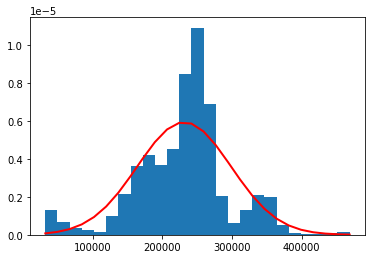

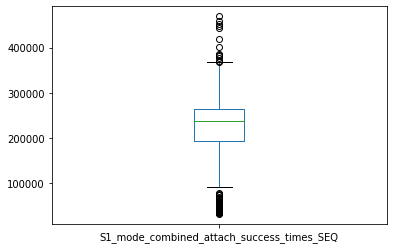

In [75]:
graficos_metrics(df2, "S1_mode_combined_attach_success_times_SEQ")

__Conclusiones__:
- Las dos series de tiempo son estacionarias, ya que presentan un patrón cíclico.
- Son discretas, ya que se toman una vez por hora.
- Las distribuciones no son simétricas, y esto se debe a picos en la serie temporal. Si estuviera más limpia creería que la distribución sería bastante simétrica respecto a la mediana.
- Capaz podría modelarse la serie con una senoidal.

## 3 - Dataset YPFD

In [81]:
df3 = pd.read_csv("YPFD.2000.2021.csv")
df3.head()

,Unnamed: 0,fechaHora,ultimoPrecio
0,0,2021-06-29 17:00:01.710,783.15
1,1,2021-06-28 17:00:03.613,807.00
2,2,2021-06-25 17:00:02.397,831.65
3,3,2021-06-24 17:00:03.497,871.40
4,4,2021-06-23 17:00:03.290,857.65


In [82]:
df3['fecha'] = pd.to_datetime(df3['fechaHora'], format="%Y-%m-%d %H:%M:%S")
df3 = df3.drop(["Unnamed: 0", "fechaHora"], axis=1)
df3 = df3.sort_values(by='fecha')
df3.head()

,ultimoPrecio,fecha
4839,0.0,2001-12-03
4838,0.0,2001-12-04
4837,0.0,2001-12-05
4836,0.0,2001-12-06
4835,0.0,2001-12-07


In [90]:
df3_2 = df3.copy()
df3_2 = df3_2[df3_2["ultimoPrecio"] > 0]
df3_2 = df3_2.reset_index()
df3_2.head()

,index,ultimoPrecio,fecha
0,968,374.677680,2017-07-05
1,967,374.876448,2017-07-06
2,966,370.404168,2017-07-07
3,965,365.832504,2017-07-10
4,964,375.572136,2017-07-11


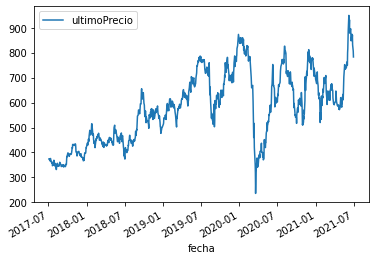

Media: 577.8031656140353
Mediana: 584.6
Desvio: 141.16612484364575
Asimetria: 0.12053806225049415


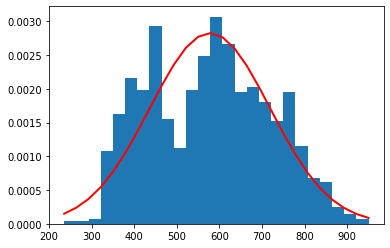

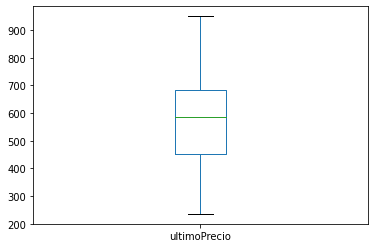

In [91]:
graficos_metrics(df3_2, "ultimoPrecio")

__Conclusiones__:
- La serie de tiempo no son estacionarias, ya que presenta un comportamiento creciente constante.
- Es discreta, aunque se toman intervalos muy cortos de muestras.
- La distribuciones no es simétrica, ya que los valores tienden a crecer (skew positivo).
- La evolución de esa serie podría moderlarse con una regresión lineas.